In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from utils import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
%matplotlib inline

In [5]:
!pip install utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing the ***Data***

In [6]:
df = pd.read_csv('house_data.csv') 
df.head()

,date,age,distance,stores,latitude,longitude,price
0,2009,21,9,6,84,121,14264
1,2007,4,2,3,86,121,12032
2,2016,18,3,7,90,120,13560
3,2002,13,2,2,80,128,12029
4,2014,25,5,8,81,122,14157


In [9]:
df.tail()

,date,age,distance,stores,latitude,longitude,price
4995,2007,17,6,3,90,125,13539
4996,2016,7,10,0,85,129,14757
4997,2017,6,10,5,90,125,14102
4998,2010,37,3,5,81,128,14313
4999,2018,9,1,9,90,127,12770


In [10]:
df.shape

(5000, 7)

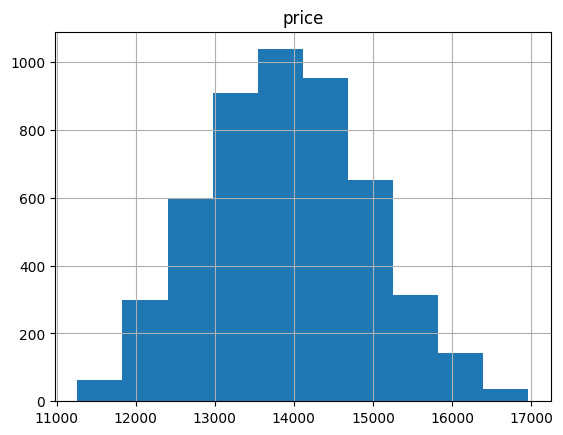

In [13]:
df.hist("price")
plt.show()

**a histogram of the values in the "price" column of the DataFrame**

In [14]:
df.isna()

,date,age,distance,stores,latitude,longitude,price
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False


**to check missing values**

In [15]:
df.isna().sum()

date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

In [16]:
df = df.iloc[:,1:]
df_norm = (df - df.mean()) / df.std()
df_norm.head()

,age,distance,stores,latitude,longitude,price
0,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266


In [17]:
X = df_norm.iloc[:, :5]
X.head()

,age,distance,stores,latitude,longitude
0,0.181384,1.257002,0.345224,-0.307212,-1.260799
1,-1.319118,-0.930610,-0.609312,0.325301,-1.260799
2,-0.083410,-0.618094,0.663402,1.590328,-1.576456
3,-0.524735,-0.930610,-0.927491,-1.572238,0.948803
4,0.534444,0.006938,0.981581,-1.255981,-0.945141


In [18]:
Y = df_norm.iloc[:, -1]
Y.head()

0    0.350088
1   -1.836486
2   -0.339584
3   -1.839425
4    0.245266
Name: price, dtype: float64

**Selecting Y and X labels**

In [19]:
X_arr = X.values
Y_arr = Y.values

In [20]:
X_arr

array([[ 0.18138426,  1.25700164,  0.34522379, -0.30721158, -1.26079862],
       [-1.31911814, -0.93060999, -0.60931203,  0.32530146, -1.26079862],
       [-0.08341028, -0.61809404,  0.66340239,  1.59032754, -1.57645598],
       ...,
       [-1.14258845,  1.56951759,  0.02704518,  1.59032754,  0.00183081],
       [ 1.59362182, -0.61809404,  0.02704518, -1.25598114,  0.94880289],
       [-0.87779391, -1.24312594,  1.2997596 ,  1.59032754,  0.63314553]])

In [21]:
Y_arr

array([ 0.35008836, -1.83648583, -0.33958379, ...,  0.19138539,
        0.39809111, -1.11350566])

**Split data into train and test**

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_arr, Y_arr, test_size = 0.01, shuffle = True, random_state=1)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (4950, 5)
y_train shape:  (4950,)
X_test shape:  (50, 5)
y_test shape:  (50,)


In [23]:
def get_model():
    
    model = Sequential([
        Dense(10, input_shape = (5,), activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(5, activation = 'relu'),
        Dense(1)
    ])

    model.compile(
        loss='mse',
        optimizer='adadelta'
    )
    
    return model

In [24]:
model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 5)                 105       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 391
Trainable params: 391
Non-trainable params: 0
_________________________________________________________________


**MODEL Created**

In [25]:
model = get_model()

# this prediction is before training the model
preds_on_untrained = model.predict(X_test)

2/2 [==============================] - 0s 6ms/step


In [26]:
# Train model and store in the object history
history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 1000
)

Epoch 1/1000
155/155 [==============================] - 2s 4ms/step - loss: 1.1223 - val_loss: 0.7664
Epoch 2/1000
155/155 [==============================] - 0s 3ms/step - loss: 1.1208 - val_loss: 0.7654
Epoch 3/1000
155/155 [==============================] - 0s 3ms/step - loss: 1.1194 - val_loss: 0.7644
Epoch 4/1000
155/155 [==============================] - 0s 3ms/step - loss: 1.1180 - val_loss: 0.7635
Epoch 5/1000
155/155 [==============================] - 0s 2ms/step - loss: 1.1167 - val_loss: 0.7626
Epoch 6/1000
155/155 [==============================] - 0s 2ms/step - loss: 1.1154 - val_loss: 0.7617
Epoch 7/1000
155/155 [==============================] - 0s 2ms/step - loss: 1.1140 - val_loss: 0.7608
Epoch 8/1000
155/155 [==============================] - 0s 2ms/step - loss: 1.1127 - val_loss: 0.7599
Epoch 9/1000
155/155 [==============================] - 0s 2ms/step - loss: 1.1114 - val_loss: 0.7590
Epoch 10/1000
155/155 [==============================] - 0s 2ms/step - loss: 1.110

In [28]:
def plot_loss(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(train_loss) + 1)

    plt.plot(epochs, train_loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

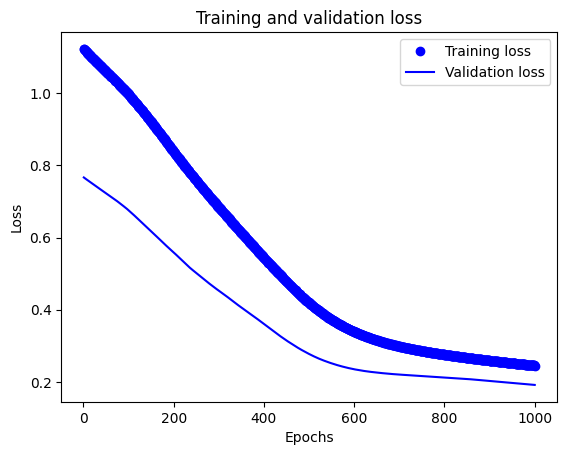

In [29]:
# plot history
plot_loss(history)

In [32]:
# make predictions on the trained model
preds_on_trained = model.predict(X_test)

2/2 [==============================] - 0s 8ms/step


In [38]:
from sklearn.metrics import accuracy_score
def compare_predictions(preds_on_untrained, preds_on_trained, y_test):
    untrained_acc = accuracy_score(y_test, preds_on_untrained)
    trained_acc = accuracy_score(y_test, preds_on_trained)

    print("Accuracy on untrained model predictions: {:.2f}%".format(untrained_acc * 100))
    print("Accuracy on trained model predictions: {:.2f}%".format(trained_acc * 100))

In [39]:
import numpy as np

unique_labels = np.unique(y_test)
print(unique_labels)

[-1.72872456 -1.46519927 -1.39760356 -1.34568222 -1.20167397 -1.15465087
 -1.13211897 -0.7627917  -0.74515803 -0.71478895 -0.65209148 -0.59919049
 -0.56588246 -0.55020809 -0.50416464 -0.4052202  -0.33272625 -0.25239512
 -0.17990118 -0.11426476 -0.06724166 -0.03981152 -0.01434067  0.01504876
  0.05325503  0.19432434  0.23742885  0.2570218   0.2609404   0.31580068
  0.36968132  0.37262026  0.50389308  0.57344809  0.60381717  0.60577647
  0.60969506  0.63026767  0.65769781  0.71745633  0.81542113  0.93395853
  1.02212684  1.10735621  1.17887051  1.27977425  1.31504157  2.37600029]


In [40]:
y_test_binary = (y_test > 0.5).astype(int)

In [42]:

unique_labels = np.unique(y_test_binary)
print(unique_labels)

[0 1]


In [44]:


unique_labels_untrained = np.unique(preds_on_untrained)
unique_labels_trained = np.unique(preds_on_trained)

print("Unique labels in preds_on_untrained:", unique_labels_untrained)
print("Unique labels in preds_on_trained:", unique_labels_trained)

Unique labels in preds_on_untrained: [-0.3364169  -0.28241396 -0.2736972  -0.26564053 -0.25699803 -0.24752724
 -0.22872812 -0.21227123 -0.20951223 -0.20031485 -0.1945215  -0.1916068
 -0.16771224 -0.16414785 -0.15995118 -0.15651166 -0.14775345 -0.14329423
 -0.1379497  -0.10232098 -0.09836844 -0.08647758 -0.07153831 -0.06789125
 -0.06745693 -0.0566703  -0.05449454 -0.04955317 -0.02443721 -0.02210496
 -0.01408232 -0.00486442 -0.00478093 -0.0037545  -0.00141429  0.
  0.01050666  0.02562205  0.02648732  0.0274195   0.04652249  0.04743241
  0.05845983  0.05850822  0.06150129  0.0794186   0.09000282  0.13438928
  0.14068726  0.20806259]
Unique labels in preds_on_trained: [-1.5326061  -1.5022684  -1.3164005  -1.2284474  -0.97855407 -0.91615933
 -0.9155282  -0.913229   -0.8820904  -0.8657302  -0.8632443  -0.8045333
 -0.64062124 -0.5416464  -0.5362365  -0.52157205 -0.5101073  -0.4984895
 -0.4910308  -0.43560857 -0.34161836 -0.27525955 -0.2552738  -0.13979445
 -0.11195308 -0.08558917 -0.07405572 

In [45]:
threshold = 0.5
binary_preds_on_untrained = (preds_on_untrained >= threshold).astype(int)
binary_preds_on_trained = (preds_on_trained >= threshold).astype(int)

In [46]:
compare_predictions(binary_preds_on_untrained, binary_preds_on_trained, y_test_binary)

Accuracy on untrained model predictions: 68.00%
Accuracy on trained model predictions: 86.00%


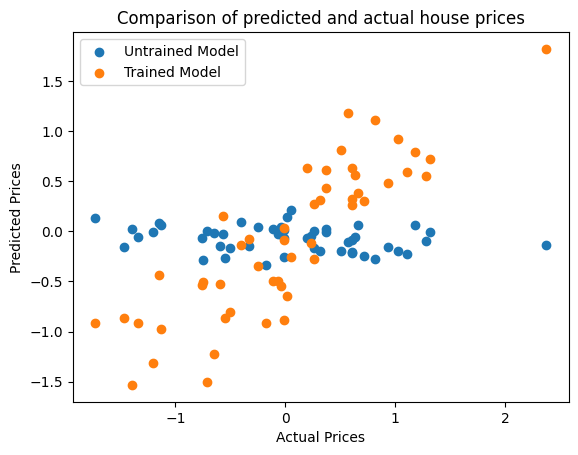

In [50]:
import matplotlib.pyplot as plt

plt.scatter(y_test, preds_on_untrained, label='Untrained Model')
plt.scatter(y_test, preds_on_trained, label='Trained Model')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Comparison of predicted and actual house prices')
plt.legend()
plt.show()

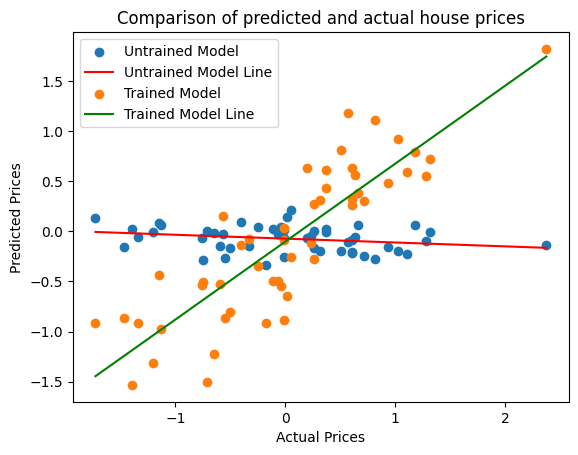

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Create array of x-values
x = np.linspace(min(y_test), max(y_test), 100)

# Compute y-values for untrained model
m_untrained, b_untrained = np.polyfit(y_test, preds_on_untrained, 1)
y_untrained = m_untrained * x + b_untrained

# Compute y-values for trained model
m_trained, b_trained = np.polyfit(y_test, preds_on_trained, 1)
y_trained = m_trained * x + b_trained

# Plot scatter plot and straight line for untrained model
plt.scatter(y_test, preds_on_untrained, label='Untrained Model')
plt.plot(x, y_untrained, color='r', label='Untrained Model Line')

# Plot scatter plot and straight line for trained model
plt.scatter(y_test, preds_on_trained, label='Trained Model')
plt.plot(x, y_trained, color='g', label='Trained Model Line')

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Comparison of predicted and actual house prices')
plt.legend()
plt.show()